## TP-3 : Implémentation de l'Autodifférentiation en Mode Reverse (Backpropagation) par surcharge d'opérateurs

### Objectif

L'objectif de ce TP est d'implémenter l'autodifférentiation en mode reverse (aussi appelé backpropagation) en utilisant la surcharge d'opérateurs. Vous allez compléter une classe Python qui représente un tenseur et implémenter les opérations arithmétiques de base (addition, soustraction, multiplication, division, puissance) ainsi que la différentiation automatique en mode reverse.

### Principe de la méthode d'autodifférentiation en mode reverse (Backpropagation)

L'autodifférentiation (ou différentiation automatique) est une technique utilisée pour calculer les dérivées de fonctions définies par des programmes informatiques. Contrairement aux méthodes de dérivation symbolique ou numérique, l'autodifférentiation est précise et efficace. Il existe deux modes principaux : le mode forward et le mode reverse.

En mode reverse (ou backpropagation), l'idée est de propager des valeurs de dérivées à travers chaque opération élémentaire de la fonction, mais dans le sens inverse de l'évaluation de la fonction. Voici comment cela fonctionne :

1. **Évaluation de la fonction** : On évalue la fonction en utilisant les valeurs d'entrée.

2. **Initialisation des dérivées sortantes** : Pour chaque variable de sortie, on associe une dérivée sortante initiale. Habituellement, on utilise 1 pour la variable de sortie d'intérêt et 0 pour les autres.

3. **Propagation inverse (Backpropagation)** : À partir des dérivées sortantes, on calcule les dérivées entrantes pour chaque opération élémentaire, en utilisant la règle de dérivation des fonctions composées (aussi appelée règle de la chaîne). 

Par exemple, pour une opération élémentaire $z = x + y$, on aurait :
   - Dérivée entrante pour $x$ : $\frac{dz}{dx} = \frac{dz}{dz} \cdot \frac{dz}{dx} = 1 \cdot 1 = 1$
   - Dérivée entrante pour $y$ : $\frac{dz}{dy} = \frac{dz}{dz} \cdot \frac{dz}{dy} = 1 \cdot 1 = 1$

   Pour une multiplication $z = x \cdot y$, on aurait :
   - Dérivée entrante pour $x$ : $\frac{dz}{dx} = \frac{dz}{dz} \cdot \frac{dz}{dx} = 1 \cdot y = y$
   - Dérivée entrante pour $y$ : $\frac{dz}{dy} = \frac{dz}{dz} \cdot \frac{dz}{dy} = 1 \cdot x = x$

4. **Résultat** : À la fin de la propagation inverse, on obtient les dérivées de la fonction par rapport à chaque variable d'entrée.

### Exemple simple

Supposons que nous voulons dériver la fonction $f(x) = x^2 + 3x$ par rapport à $x$ en utilisant la backpropagation.

1. **Évaluation de la fonction** :
   - $x = x$
   - $u = x^2$
   - $v = 3x$
   - $f = u + v$

2. **Initialisation des dérivées sortantes** :
   - $\frac{df}{df} = 1$ (puisque nous dérivons par rapport à $f$)

3. **Propagation inverse (Backpropagation)** :
   - Première opération inverse : $f = u + v$
     - $\frac{du}{df} = \frac{du}{du} \cdot \frac{du}{df} = 1 \cdot 1 = 1$
     - $\frac{dv}{df} = \frac{dv}{dv} \cdot \frac{dv}{df} = 1 \cdot 1 = 1$
   - Deuxième opération inverse : $u = x^2$
     - $\frac{dx}{du} = \frac{dx}{dx} \cdot \frac{dx}{du} = 1 \cdot 2x = 2x$
   - Troisième opération inverse : $v = 3x$
     - $\frac{dx}{dv} = \frac{dx}{dx} \cdot \frac{dx}{dv} = 1 \cdot 3 = 3$

4. **Résultat** :
   - La valeur de la fonction est $f(x) = x^2 + 3x$
   - La dérivée de la fonction est $\frac{df}{dx} = 2x + 3$

### Description du Projet

Vous allez implémenter une classe `Tensor` qui représente un tenseur. Chaque `Tensor` contient deux attributs :
- `value` : la valeur du tenseur.
- `gradients` : un dictionnaire représentant les gradients (dérivées), où les clés sont des instances de `Tensor` et les valeurs sont les gradients correspondants.

### Méthodes à Implémenter

1. **Constructeur (`__init__`)** :
    - Initialise un `Tensor` avec une valeur et un dictionnaire de gradients vides.

2. **Évaluation (`eval`)** :
    - Évalue le tenseur et retourne sa valeur.

3. **Addition (`__add__` et `__radd__`)** :
    - Permet l'addition de deux tenseurs ou l'addition d'un scalaire à un tenseur.

4. **Soustraction (`__sub__` et `__rsub__`)** :
    - Permet la soustraction de deux tenseurs ou la soustraction d'un scalaire d'un tenseur.

5. **Multiplication (`__mul__` et `__rmul__`)** :
    - Permet la multiplication de deux tenseurs ou la multiplication d'un scalaire par un tenseur.

6. **Division (`__truediv__` et `__rtruediv__`)** :
    - Permet la division de deux tenseurs ou la division d'un scalaire par un tenseur.

7. **Puissance (`__pow__`)** :
    - Permet d'élever un tenseur à une puissance donnée.

8. **Négation (`__neg__`)** :
    - Permet de négativer un tenseur.

9. **Méthode auxiliaire `zero_grad`** :
    - Permet de remettre à zéro tous les gradients.

10. **Méthode auxiliaire `backward`** :
    - Permet d'effectuer la propagation inverse (backpropagation) à partir d'un gradient sortant donné.

11. **Représentation en chaîne (`__str__`)** :
    - Retourne une représentation en chaîne de caractères du tenseur.

### Instructions

1. Implémentez la classe `Tensor` avec les méthodes décrites ci-dessus.
2. Testez chaque méthode avec des exemples concrets pour vérifier leur bon fonctionnement.
3. Documentez votre code et commentez chaque méthode pour expliquer son fonctionnement.

### Évaluation

Votre projet sera évalué sur les critères suivants :
- Fonctionnalité : Toutes les méthodes doivent fonctionner correctement et produire les résultats attendus.
- Qualité du code : Votre code doit être bien structuré, lisible et commenté.
- Tests : Vous devez fournir des exemples de tests démontrant le bon fonctionnement de chaque méthode.
- Documentation : Votre documentation doit être clair, bien organisé et expliquer votre démarche et vos résultats.

Bon travail et bonne programmation !

### Préliminaire, surcharge des opérateurs et plot du graphe de calcul

Dans cet exercice, vous allez créer une classe `Tensor` en Python qui représente un tenseur scalaire et son gradient. Vous allez ensuite définir plusieurs opérations sur ces tenseurs et visualiser le graphe de calcul associé à ces opérations à l'aide de la bibliothèque `graphviz`.

#### Instructions

1. **Définition de la Classe `Tensor`**:
    - Implémentez la classe `Tensor` avec un constructeur pour initialiser les données et les variables internes pour la construction du graphe d'autograd.
    - Définissez les opérations suivantes pour la classe `Tensor` :
        - Addition (`__add__`)
        - Multiplication (`__mul__`)
        - Puissance (`__pow__`)
        - Fonction ReLU (`relu`)
        - Négation (`__neg__`)
        - Soustraction (`__sub__`)
        - Division (`__truediv__`)
    - Implémentez la méthode `backward` pour effectuer la rétropropagation et calculer les gradients.

2. **Création et Visualisation du Graphe de Calcul**:
    - Créez des instances de `Tensor` pour les valeurs 1.0, 2.0 et 3.0.
    - Effectuez les opérations suivantes sur ces tenseurs :
        - `a = x + y`
        - `b = a * z`
        - `c = b ** 2`
        - `d = c.relu()`
    - Utilisez la méthode `plot_graph` pour visualiser le graphe de calcul des tenseurs.


Tensor(data=3.0) Op: 
Tensor(data=2.0) Op: 
Tensor(data=1.0) Op: 
Tensor(data=3.0) Op: +
Tensor(data=9.0) Op: *
Tensor(data=81.0) Op: **2
Tensor(data=81.0) Op: ReLU


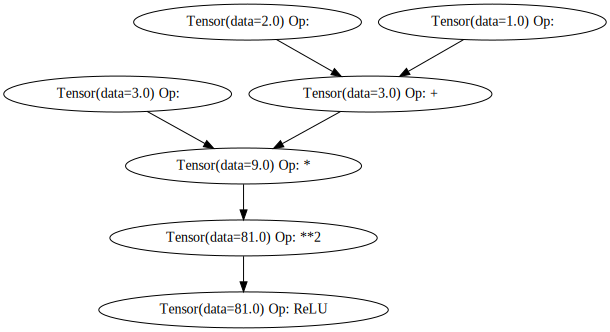

In [2]:
import graphviz as gv
from IPython.display import display

class Tensor:
    """ stores a single scalar Tensor and its gradient """

    def __init__(self, data, _children=(), _op=''):

        self.data = data

        # internal variables used for autograd graph construction
        self._prev = set(_children)
        self._op = _op  # the op that produced this node, for graphviz / debugging / etc
        self._backward = lambda x: x

    def __add__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data + other.data, [self, other], '+')
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)
        out = Tensor(self.data * other.data, [self, other], '*')
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Tensor(self.data**other, [self], f'**{other}')
        return out

    def relu(self):
        out = Tensor(0 if self.data < 0 else self.data, [self], 'ReLU')
        return out

    def __neg__(self):  # -self
        return self * -1

    def __radd__(self, other):  # other + self
        return self + other

    def __sub__(self, other):  # self - other
        return self + (-other)

    def __rsub__(self, other):  # other - self
        return other + (-self)

    def __rmul__(self, other):  # other * self
        return self * other

    def __truediv__(self, other):  # self / other
        return self * other**-1

    def __rtruediv__(self, other):  # other / self
        return other * self**-1

    def __repr__(self):
        return f"Tensor(data={self.data}) Op: {self._op}"

    def build_topo(self, visited=None, topo=None):
        if self not in visited:
            visited.add(self)
            for child in self._prev:
                child.build_topo(visited=visited, topo=topo)
            topo.append(self)
        return topo

    def backward(self):
        # topological order all of the children in the graph
        topo = []
        visited = set()
        topo = self.build_topo(topo=topo, visited=visited)

        # go one variable at a time and apply the chain rule to get its gradient
        self.grad = 1
        for v in reversed(topo):
            v._backward()

    def plot_graph(self, filename='graph.png'):
        # create a graphviz digraph
        g = gv.Digraph(comment='Tensor Computation Graph')

        # add a node for this tensor
        g.node(str(id(self)), str(self))

        # recursively add nodes for all children
        def add_children(v):
            for child in v._prev:
                g.node(str(id(child)), str(child))
                g.edge(str(id(child)), str(id(v)))
                add_children(child)
        add_children(self)
        display(gv.Source(g.source))

if __name__ == '__main__':

    # create some tensors
    x = Tensor(1.0)
    y = Tensor(2.0)
    z = Tensor(3.0)

    # compute some operations
    a = x + y
    b = a * z
    c = b ** 2
    d = c.relu()

    topo = []
    visited = set()
    topo = d.build_topo(topo=topo, visited=visited)
    print("\n".join([str(item) for item in topo]))

    # plot the computation graph
    d.plot_graph()

### Exercice de Programmation en Python : Implémentation d'un Tenseur Autograd

#### Sujet

Dans cet exercice, vous allez implémenter une classe `Tensor` en Python qui représente un tenseur scalaire et son gradient, avec la capacité de construire un graphe de calcul et de calculer les gradients par rétropropagation.

#### Instructions

1. **Définition de la Classe `Tensor`**:
    - Implémentez la classe `Tensor` avec un constructeur pour initialiser les données, le gradient, et les variables internes pour la construction du graphe d'autograd.
    - Implémentez les méthodes pour les opérations arithmétiques, la fonction ReLU, et la rétropropagation.

2. **Création des Tenseurs et Calcul des Opérations**:
    - Créez des instances de `Tensor` avec les valeurs 1.0, 2.0 et 3.0.
    - Effectuez les opérations suivantes sur ces tenseurs :
        - `a = x + y`
        - `b = a * z`
        - `c = b ** 2`
        - `d = c.relu()`

3. **Calcul des Gradients**:
    - Appelez la méthode `backward` sur le tenseur final pour calculer les gradients de tous les tenseurs dans le graphe de calcul.

4. **Affichage des Résultats**:
    - Affichez les tenseurs avec leurs gradients respectifs après la rétropropagation.


In [6]:
import numpy as np

class Tensor:
    
    """ stores a single scalar Tensor and its gradient """

    def __init__(self, data, _children=(), _op=''):

        self.data = data
        self.grad = 0.0

        # internal variables used for autograd graph construction
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op # the op that produced this node, for graphviz / debugging / etc

    def __add__(self, other):

        # (1) if other is not a Tensor, convert it to one
        other = other if isinstance(other, Tensor) else Tensor(other)

        # (2) create a new Tensor that is the sum of self and other
        out = Tensor(self.data + other.data, (self, other), '+')

        # (3) define the backward function for this operation
        def _backward():
            self.grad += out.grad
            other.grad += out.grad
        out._backward = _backward

        # (4) return the new Tensor
        return out

    def __mul__(self, other):

        # (1) if other is not a Tensor, convert it to one
        other = other if isinstance(other, Tensor) else Tensor(other)

        # (2) create a new Tensor that is the product of self and other
        out = Tensor(self.data * other.data, [self, other], '*')

        # (3) define the backward function for this operation
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        # (4) return the new Tensor
        return out

    def __pow__(self, other):
        other = other if isinstance(other, Tensor) else Tensor(other)

        out = Tensor(self.data ** other.data, [self, other], '**')

        def _backward():
            self.grad += other.data * (self.data ** (other.data - 1)) * out.grad
            other.grad += (self.data ** other.data) * (0 if self.data <= 0 else np.log(self.data)) * out.grad
        out._backward = _backward

        return out

    def relu(self):
        out = Tensor(np.max(self.data, 0), [self], 'ReLU')

        def _backward():
            self.grad += (1 if self.data >= 0 else 0) * out.grad
        out._backward = _backward

        # (4) return the new Tensor
        return out

    def build_topo(self, visited=None, topo=None):
        if self not in visited:
            visited.add(self)
            for child in self._prev:
                child.build_topo(visited=visited, topo=topo)
            topo.append(self)
        return topo

    def backward(self):
        # topological order all of the children in the graph
        topo = []
        visited = set()
        topo = self.build_topo(topo=topo, visited=visited)

        # go one variable at a time and apply the chain rule to get its gradient
        self.grad = 1.0
        for v in reversed(topo):
            v._backward()


    def __neg__(self): # -self
        return self * Tensor(-1)

    def __radd__(self, other): # other + self
        return other + self

    def __sub__(self, other): # self - other
        other = other if isinstance(other, Tensor) else Tensor(other)

        out = Tensor(self.data - other.data, (self, other), '-')

        def _backward():
            self.grad += out.grad
            other.grad -= out.grad
        out._backward = _backward

        return out

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __rmul__(self, other): # other * self
        return self * other 

    def __truediv__(self, other): # self / other
        other = other if isinstance(other, Tensor) else Tensor(other)

        out = Tensor(self.data * other.data, [self, other], '/')

        def _backward():
            self.grad += 1 / other.data * out.grad
            other.grad += -self.data / (other.data**2) * out.grad
        out._backward = _backward

        return out

    def __rtruediv__(self, other): # other / self
        return other / self

    def __repr__(self):
        return f"Tensor(data={self.data}, grad={self.grad})"

In [7]:
import torch

x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

z = 2.0*x + y**2.0
z.backward()

print(x)
print(x.grad)
print(" --- ")

print(y)
print(y.grad)
print(" --- ")

print(z)
print(z.grad)

tensor(1., requires_grad=True)
tensor(2.)
 --- 
tensor(2., requires_grad=True)
tensor(4.)
 --- 
tensor(6., grad_fn=<AddBackward0>)
None


/tmp/ipykernel_175397/3936611724.py:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(z.grad)


### Test Unitaire

In [8]:
import torch
import numpy as np

if __name__ == '__main__':

    # Test 1: Addition and multiplication
    x = Tensor(1.0)
    y = Tensor(2.0)
    out = x * 2.0 + y
    out.backward()
    print("Test 1: x.grad, y.grad")    
    print(x.grad, y.grad)
    print("out")
    print(out.grad)
    x_t = torch.tensor(1.0, requires_grad=True)
    y_t = torch.tensor(2.0, requires_grad=True)
    out_t = x_t * 2.0 + y_t
    out_t.backward()
    assert np.isclose(x_t.grad, x.grad)
    assert np.isclose(y_t.grad, y.grad)

    # Test 2: Subtraction
    x = Tensor(3.0)
    y = Tensor(1.0)
    out = x - y
    out.backward()
    print("Test 2: x.grad, y.grad")
    print(x.grad, y.grad)
    x_t = torch.tensor(3.0, requires_grad=True)
    y_t = torch.tensor(1.0, requires_grad=True)
    out_t = x_t - y_t
    out_t.backward()
    assert np.isclose(x_t.grad, x.grad)
    assert np.isclose(y_t.grad, y.grad)

    # Test 3: Division
    x = Tensor(4.0)
    y = Tensor(2.0)
    out = x / y
    out.backward()
    print("Test 3: x.grad, y.grad")
    print(x.grad, y.grad)
    x_t = torch.tensor(4.0, requires_grad=True)
    y_t = torch.tensor(2.0, requires_grad=True)
    out_t = x_t / y_t
    out_t.backward()
    assert np.isclose(x_t.grad, x.grad)
    assert np.isclose(y_t.grad, y.grad)

    # Test 4: Negation
    x = Tensor(5.0)
    out = -x
    out.backward()
    print("Test 4: x.grad")
    print(x.grad)
    x_t = torch.tensor(5.0, requires_grad=True)
    out_t = -x_t
    out_t.backward()
    assert np.isclose(x_t.grad, x.grad)

    # Test 5: Power
    x = Tensor(2.0)
    out = x ** 3
    out.backward()
    print("Test 5: x.grad")
    print(x.grad)
    x_t = torch.tensor(2.0, requires_grad=True)
    out_t = x_t ** 3
    out_t.backward()
    assert np.isclose(x_t.grad, x.grad)

    # Test 6: ReLU
    x = Tensor(-1.0)
    out = x.relu()
    out.backward()
    print("Test 6: x.grad (ReLU)")
    print(x.grad)
    x_t = torch.tensor(-1.0, requires_grad=True)
    out_t = torch.relu(x_t)
    out_t.backward()
    assert np.isclose(x_t.grad, x.grad)

    # Test 7: Chained operations
    x = Tensor(1.5)
    y = Tensor(2.5)
    z = Tensor(-3.0)
    out = ((x + y) * z) ** 2
    out.backward()
    print("Test 7: x.grad, y.grad, z.grad (chained)")
    print(x.grad, y.grad, z.grad)
    x_t = torch.tensor(1.5, requires_grad=True)
    y_t = torch.tensor(2.5, requires_grad=True)
    z_t = torch.tensor(-3.0, requires_grad=True)
    out_t = ((x_t + y_t) * z_t) ** 2
    out_t.backward()
    assert np.isclose(x_t.grad, x.grad)
    assert np.isclose(y_t.grad, y.grad)
    assert np.isclose(z_t.grad, z.grad)

Test 1: x.grad, y.grad
2.0 1.0
out
1.0
Test 2: x.grad, y.grad
1.0 -1.0
Test 3: x.grad, y.grad
0.5 -1.0
Test 4: x.grad
-1.0
Test 5: x.grad
12.0
Test 6: x.grad (ReLU)
0.0
Test 7: x.grad, y.grad, z.grad (chained)
72.0 72.0 -96.0


### Fonctions Mathématiques pour l'Autodifférentiation en mode reverse

#### Objectif

L'objectif de cette partie du TP est d'implémenter des fonctions mathématiques couramment utilisées dans le contexte de l'autodifférentiation en mode reverse. Vous allez créer des fonctions qui calculent à la fois la valeur d'une fonction mathématique et sa dérivée.

Vous allez implémenter plusieurs fonctions mathématiques en utilisant des nombres duals représentés par la classe Tensor. Chaque fonction doit calculer la valeur de la fonction et la dérivée, et renvoyer un objet Tensor contenant ces informations.

#### Fonctions à Implémenter

1. **Logarithme naturel (`log_d`)** :
    - Calcule la valeur du logarithme naturel et sa dérivée.

2. **Exponentielle (`exp_d`)** :
    - Calcule la valeur de l'exponentielle et sa dérivée.

3. **Sinus (`sin_d`)** :
    - Calcule la valeur du sinus et sa dérivée.

4. **Cosinus (`cos_d`)** :
    - Calcule la valeur du cosinus et sa dérivée.

5. **Sigmoïde (`sigmoid_d`)** :
    - Calcule la valeur de la fonction sigmoïde et sa dérivée.

6. **Tangente hyperbolique (`tanh_d`)** :
    - Calcule la valeur de la tangente hyperbolique et sa dérivée.

7. **Tangente (`tan_d`)** :
    - Calcule la valeur de la tangente et sa dérivée.

8. **Racine carrée (`sqrt_d`)** :
    - Calcule la valeur de la racine carrée et sa dérivée.

9. **Puissance (`pow_d`)** :
    - Calcule la valeur de la fonction puissance et sa dérivée.


#### Instructions

1. Implémentez les fonctions décrites ci-dessus.
2. Testez chaque fonction avec des exemples concrets pour vérifier leur bon fonctionnement.
3. Documentez votre code et commentez chaque fonction pour expliquer son fonctionnement.
4. Créez un rapport détaillé décrivant votre implémentation, les tests effectués et les résultats obtenus.



In [9]:
import numpy as np

def log_d(dual_number: Tensor):
    # Implements log(x) with reverse-mode autodiff
    out = Tensor(np.log(dual_number.data), (dual_number,), 'log')
    def _backward():
        dual_number.grad += (1 / dual_number.data) * out.grad
    out._backward = _backward
    return out

def exp_d(dual_number: Tensor):
    # Implements exp(x) with reverse-mode autodiff
    out = Tensor(np.exp(dual_number.data), (dual_number,), 'exp')
    def _backward():
        dual_number.grad += out.data * out.grad
    out._backward = _backward
    return out

def sin_d(dual_number: Tensor):
    out = Tensor(np.sin(dual_number.data), (dual_number,), 'sin')
    def _backward():
        dual_number.grad += np.cos(dual_number.data) * out.grad
    out._backward = _backward
    return out

def cos_d(dual_number: Tensor):
    out = Tensor(np.cos(dual_number.data), (dual_number,), 'cos')
    def _backward():
        dual_number.grad += -np.sin(dual_number.data) * out.grad
    out._backward = _backward
    return out

def sigmoid_d(dual_number: Tensor):
    out = Tensor(1 / (1 + np.exp(-dual_number.data)), (dual_number,), 'sigmoid') 
    def _backward():
        dual_number.grad += out.data * (1 - out.data) * out.grad
    out._backward = _backward
    return out   

def tanh_d(dual_number: Tensor):
    out = Tensor(np.tanh(dual_number.data), (dual_number,), 'tanh')
    def _backward():
        dual_number.grad += (1 - out.data**2) * out.grad
    out._backward = _backward
    return out

def tan_d(dual_number: Tensor):
    # Implements tan(x) with reverse-mode autodiff
    out = Tensor(np.tan(dual_number.data), (dual_number,), 'tan')
    def _backward():
        dual_number.grad += (1 / np.cos(dual_number.data)**2) * out.grad
    out._backward = _backward
    return out

def sqrt_d(dual_number: Tensor):
    # Implements sqrt(x) with reverse-mode autodiff
    out = Tensor(np.sqrt(dual_number.data), (dual_number,), 'sqrt')
    def _backward():
        dual_number.grad += (0.5 / np.sqrt(dual_number.data)) * out.grad
    out._backward = _backward
    return out

def pow_d(dual_number: Tensor, power: int):
    # Implements x^power with reverse-mode autodiff
    out = Tensor(dual_number.data ** power, (dual_number,), f'**{power}')
    def _backward():
        dual_number.grad += (power * dual_number.data ** (power - 1)) * out.grad
    out._backward = _backward
    return out

def softmax_d(dual_number: Tensor):
    # Implements softmax(x) with reverse-mode autodiff
    out = Tensor(np.exp(dual_number.data) / np.sum(np.exp(dual_number.data)), (dual_number,), 'softmax')
    def _backward():
        dual_number.grad += (1) * out.grad
    out._backward = _backward
    return out


### Main test

Dans cette section, vous allez définir une collection de fonctions de test pour valider votre implémentation des fonctions mathématiques et de la rétropropagation dans la classe `Tensor`. Vous comparerez les gradients obtenus avec ceux calculés par PyTorch, une bibliothèque populaire pour le calcul automatique des gradients.

#### Objectif

L'objectif est de s'assurer que les gradients calculés par vos méthodes `Tensor` sont corrects en les comparant avec les gradients obtenus via PyTorch. Cette validation est essentielle pour garantir la précision de votre implémentation.

#### Validation des Gradients

Nous utiliserons des assertions pour vérifier que les gradients calculés par votre implémentation sont proches de ceux de PyTorch.


In [10]:
import numpy as np
import torch

# Define the function for which we want to compute the gradient
def f(x):
    return x**2 + 2*x + 1

# Cubic function
def f7(x):
    return x**3 + 3*x**2 - 2*x + 5

# Quartic function
def f8(x):
    return x**4 + 4*x**3 - 3*x**2 + 6*x + 7

# Quintic function
def f9(x):
    return x**5 + 5*x**4 - 4*x**3 + 8*x**2 + 9*x + 10

# Exponential function
def f10(x):
    return exp_d(x)

def f10_torch(x):
    return torch.exp(x)

# Logarithmic function
def f11(x):
    return log_d(x)

def f11_torch(x):
    return torch.log(x)

# Sinusoidal function
def f12(x):
    return sin_d(x)

def f12_torch(x):
    return torch.sin(x)

# Cosinusoidal function
def f13(x):
    return cos_d(x)

def f13_torch(x):
    return torch.cos(x)

# Tangent function
def f14(x):
    return tan_d(x)

def f14_torch(x):
    return torch.tan(x)

# Hyperbolic tangent function
def f17(x):
    return tanh_d(x)

def f17_torch(x):
    return torch.tanh(x)

# Inverse function
def f18(x):
    return 1/x

# Square root function
def f19(x):
    return sqrt_d(x)

def f19_torch(x):
    return torch.sqrt(x)

# Natural logarithm function
def f22(x):
    return log_d(x)

def f22_torch(x):
    return torch.log(x)

# Define the function for which we want to compute the gradient
def f(x):
    return x**2 + 2*x + 1

# Cubic function with sin
def f27(x):
    return x**3 + 3*x**2 - 2*x + sin_d(x) + 5

def f27_torch(x):
    return x**3 + 3*x**2 - 2*x + torch.sin(x) + 5

# Quartic function with cos
def f28(x):
    return x**4 + 4*x**3 - 3*x**2 + 6*x + cos_d(x) + 7

def f28_torch(x):
    return x**4 + 4*x**3 - 3*x**2 + 6*x + torch.cos(x) + 7

# Quintic function with sin and cos
def f29(x):
    return x**5 + 5*x**4 - 4*x**3 + 8*x**2 + 9*x + sin_d(x) + cos_d(x) + 10

def f29_torch(x):
    return x**5 + 5*x**4 - 4*x**3 + 8*x**2 + 9*x + torch.sin(x) + torch.cos(x) + 10

# Function with sin^2 and cos^2
def f30(x):
    return sin_d(x)**2 + cos_d(x)**2 + x**2

def f30_torch(x):
    return torch.sin(x)**2 + torch.cos(x)**2 + x**2

# Function with sin^3 and cos^3
def f31(x):
    return sin_d(x)**3 + cos_d(x)**3 + x**3

def f31_torch(x):
    return torch.sin(x)**3 + torch.cos(x)**3 + x**3


In [11]:
import torch

if __name__ == "__main__":

    ### define a list of functions
    functions = [f, f7, f8, f9, f10, f11, f12]
    functions_torch = [f, f7, f8, f9, f10_torch, f11_torch, f12_torch]

    for f, f_torch in zip(functions, functions_torch):

        # Create a tensor with a single value
        x = Tensor(0.1)
        x_torch = torch.tensor(x.data, requires_grad=True)

        # Compute the function value
        y = f(x)
        y_torch = f_torch(x_torch)

        y.backward()
        y_torch.backward()

        # Compare the gradients
        print(x.grad)
        print(x_torch.grad)
        print()

        assert np.isclose(x.grad, 
                          x_torch.grad.item(), 
                          atol=1e-6)

2.2
tensor(2.2000)

-1.3699999999999999
tensor(-1.3700)

5.524
tensor(5.5240)

10.5005
tensor(10.5005)

1.1051709180756477
tensor(1.1052)

10.0
tensor(10.)

0.9950041652780258
tensor(0.9950)



### Réseau de Neurones avec une Couche Cachée

#### Objectif

L'objectif de cette section est de définir et de tester un réseau de neurones multicouche (MLP) avec une seule couche cachée en utilisant la classe `Tensor` que vous avez développée. Vous comparerez les résultats de la rétropropagation avec ceux obtenus par PyTorch pour valider l'exactitude de votre implémentation.

#### Instructions

1. **Définition du Réseau de Neurones** :
    - Définissez un réseau de neurones avec une seule couche cachée en utilisant votre classe `Tensor`. Utilisez la fonction d'activation hyperbolique tangente (`tanh`).

2. **Implémentation avec PyTorch** :
    - Définissez le même réseau de neurones en utilisant PyTorch pour comparer les résultats.

3. **Calcul des Gradients** :
    - Calculez les gradients en utilisant la méthode `backward()` de votre classe `Tensor`.
    - Calculez les gradients en utilisant PyTorch.

4. **Validation des Résultats** :
    - Comparez les gradients obtenus par votre implémentation avec ceux obtenus par PyTorch pour vous assurer qu'ils sont similaires.

Epoch 1, Sample 1
W1.grad: -3.86831371848388, b1.grad: 1.93415685924194, W2.grad: 0.0, b2.grad: 6.447189530806467
W1.data: 0.1, b1.data: 0.2, W2.data: 0.3, b2.data: 0.4
loss: 10.391563211535129
Epoch 1, Sample 2
W1.grad: -3.7167320947323064, b1.grad: 1.896682873085043, W2.grad: -0.5791801513837508, b2.grad: 6.374896649281693
W1.data: 0.13868313718483882, b1.data: 0.18065843140758062, W2.data: 0.3, b2.data: 0.33552810469193534
loss: 10.15982682225574
Epoch 1, Sample 3
W1.grad: -3.3680399989312875, b1.grad: 1.7549261047063025, W2.grad: -1.0298198545818364, b2.grad: 5.918156545379608
W1.data: 0.17585045813216188, b1.data: 0.1616916026767302, W2.data: 0.3057918015138375, b2.data: 0.2717791381991184
loss: 8.756144223904874
Epoch 1/100, Loss: 2.3657334119998765
Epoch 2, Sample 1
W1.grad: -6.325786060021144, b1.grad: 3.162893030010572, W2.grad: -4.686133807234142, b2.grad: 5.656645708010163
W1.data: 0.8826019791179143, b1.data: 0.582093828833881, W2.data: 1.782400727831169, b2.data: 1.4813219

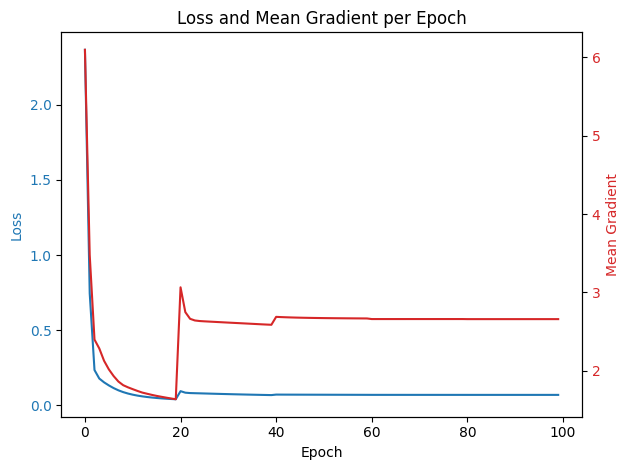

In [18]:

# define a neural network, MLP with 1 hidden layer
def func_nn(x, W1, b1, W2, b2):
    h1 = tanh_d(W1*x + b1)
    y = W2*h1 + b2
    return y

def mse(y, y_hat):
    loss = (y - y_hat)**2
    return loss

if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    
    ## generate data
    np.random.seed(0)
    x = np.linspace(-2, 2, 100)
    y = 2*x + 1 + np.random.randn(100)*0.1

    ## Parameters
    W1 = Tensor(0.1)
    b1 = Tensor(0.2)
    W2 = Tensor(0.3)
    b2 = Tensor(0.4)
    
    lr = 0.01
    nb_epoch = 100
    loss_history = []
    grad_history = []
    for epoch in range(nb_epoch):
        
        lst_loss = []
        grad_sum = 0.0
        for i in range(len(x)):
            x_i = Tensor(x[i])
            y_i = Tensor(y[i])

            y_hat = func_nn(x_i, W1, b1, W2, b2)
            loss = mse(y_i, y_hat)
            loss.backward()

            lst_loss.append(loss.data)
            grad_sum += abs(W1.grad) + abs(b1.grad) + abs(W2.grad) + abs(b2.grad)

            # Print gradients for debugging (first 3 epochs and first 3 samples)
            if epoch < 3 and i < 3:
                print(f"Epoch {epoch+1}, Sample {i+1}")
                print(f"W1.grad: {W1.grad}, b1.grad: {b1.grad}, W2.grad: {W2.grad}, b2.grad: {b2.grad}")
                print(f"W1.data: {W1.data}, b1.data: {b1.data}, W2.data: {W2.data}, b2.data: {b2.data}")
                print(f"loss: {loss.data}")

            # FIXME: Update with the gradient
            W1.data -= lr * W1.grad
            b1.data -= lr * b1.grad
            W2.data -= lr * W2.grad
            b2.data -= lr * b2.grad

            # FIXME: reset gradients
            W1.grad = 0.0
            b1.grad = 0.0
            W2.grad = 0.0
            b2.grad = 0.0

        mean_loss = np.mean(lst_loss)
        mean_grad = grad_sum / len(x)
        loss_history.append(mean_loss)
        grad_history.append(mean_grad)
        print(f"Epoch {epoch+1}/{nb_epoch}, Loss: {mean_loss}")

        # learning rate decay (fix: only decay every 20 epochs)
        if (epoch + 1) % 20 == 0:
            lr *= 0.1

    # Plot loss and gradient
    fig, ax1 = plt.subplots()
    ax1.plot(loss_history, color='tab:blue', label='Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(grad_history, color='tab:red', label='Gradient')
    ax2.set_ylabel('Mean Gradient', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title('Loss and Mean Gradient per Epoch')
    fig.tight_layout()
    plt.show()

### Entraînement d'un Réseau de Neurones avec une Couche Cachée

#### Objectif

L'objectif de cette section est de définir, entraîner et évaluer un réseau de neurones multicouche (MLP) avec une seule couche cachée en utilisant la classe `Tensor`. Vous allez également comparer les résultats de l'entraînement avec ceux obtenus par PyTorch pour valider l'exactitude de votre implémentation.

#### Instructions

1. **Définition du Réseau de Neurones** :
    - Définissez un réseau de neurones avec une seule couche cachée en utilisant votre classe `Tensor`.

2. **Fonction de Perte** :
    - Implémentez la fonction de perte d'erreur quadratique moyenne (MSE).

3. **Entraînement du Réseau** :
    - Entraînez le réseau de neurones en utilisant une simple boucle d'entraînement. Mettez à jour les poids et les biais en utilisant la rétropropagation et une descente de gradient.

4. **Comparaison avec PyTorch** :
    - Implémentez le même réseau de neurones et l'entraînement en utilisant PyTorch pour comparer les résultats.

5. **Validation des Résultats** :
    - Comparez les pertes et les gradients obtenus par votre implémentation avec ceux obtenus par PyTorch pour vous assurer qu'ils sont similaires.

Epoch 1, Sample 1
W1.grad: -3.86831371848388, b1.grad: 1.93415685924194, W2.grad: 0.0, b2.grad: 6.447189530806467
W1.data: 0.1, b1.data: 0.2, W2.data: 0.3, b2.data: 0.4
loss: 10.391563211535129
Epoch 1, Sample 2
W1.grad: -3.7167320947323064, b1.grad: 1.896682873085043, W2.grad: -0.5791801513837508, b2.grad: 6.374896649281693
W1.data: 0.13868313718483882, b1.data: 0.18065843140758062, W2.data: 0.3, b2.data: 0.33552810469193534
loss: 10.15982682225574
Epoch 1, Sample 3
W1.grad: -3.3680399989312875, b1.grad: 1.7549261047063025, W2.grad: -1.0298198545818364, b2.grad: 5.918156545379608
W1.data: 0.17585045813216188, b1.data: 0.1616916026767302, W2.data: 0.3057918015138375, b2.data: 0.2717791381991184
loss: 8.756144223904874
Epoch 1/100, Loss: 2.3657334119998765
Epoch 2, Sample 1
W1.grad: -6.325786060021144, b1.grad: 3.162893030010572, W2.grad: -4.686133807234142, b2.grad: 5.656645708010163
W1.data: 0.8826019791179143, b1.data: 0.582093828833881, W2.data: 1.782400727831169, b2.data: 1.4813219

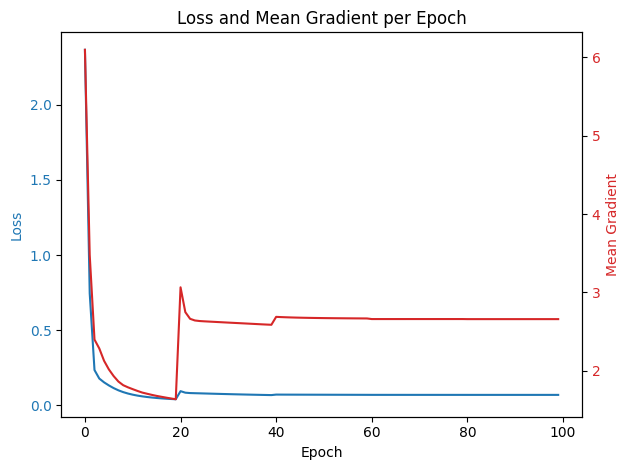

In [ ]:
# define a neural network, MLP with 1 hidden layer
def func_nn(x, W1, b1, W2, b2):
    #FIXME
    pass

def mse_with_backward(y, y_hat):
    #FIXME
    pass

def mse(y, y_hat):
    #FIXME
    pass


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    
    ## generate data
    np.random.seed(0)
    x = np.linspace(-2, 2, 100)
    y = 2*x + 1 + np.random.randn(100)*0.1

    ## Parameters
    W1 = Tensor(0.1)
    b1 = Tensor(0.2)
    W2 = Tensor(0.3)
    b2 = Tensor(0.4)
    
    lr = 0.01
    nb_epoch = 100
    loss_history = []
    grad_history = []
    for epoch in range(nb_epoch):
        
        lst_loss = []
        grad_sum = 0.0
        for i in range(len(x)):
            x_i = Tensor(x[i])
            y_i = Tensor(y[i])

            y_hat = func_nn(x_i, W1, b1, W2, b2)
            loss = mse(y_i, y_hat)
            loss.backward()

            lst_loss.append(loss.data)
            grad_sum += abs(W1.grad) + abs(b1.grad) + abs(W2.grad) + abs(b2.grad)

            # Print gradients for debugging (first 3 epochs and first 3 samples)
            if epoch < 3 and i < 3:
                print(f"Epoch {epoch+1}, Sample {i+1}")
                print(f"W1.grad: {W1.grad}, b1.grad: {b1.grad}, W2.grad: {W2.grad}, b2.grad: {b2.grad}")
                print(f"W1.data: {W1.data}, b1.data: {b1.data}, W2.data: {W2.data}, b2.data: {b2.data}")
                print(f"loss: {loss.data}")

            # FIXME: Update with the gradient

            # FIXME: reset gradients

        mean_loss = np.mean(lst_loss)
        mean_grad = grad_sum / len(x)
        loss_history.append(mean_loss)
        grad_history.append(mean_grad)
        print(f"Epoch {epoch+1}/{nb_epoch}, Loss: {mean_loss}")

        # learning rate decay (fix: only decay every 20 epochs)
        if (epoch + 1) % 20 == 0:
            lr *= 0.1

    # Plot loss and gradient
    fig, ax1 = plt.subplots()
    ax1.plot(loss_history, color='tab:blue', label='Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(grad_history, color='tab:red', label='Gradient')
    ax2.set_ylabel('Mean Gradient', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title('Loss and Mean Gradient per Epoch')
    fig.tight_layout()
    plt.show()

### Entraînement d'un Réseau Récurrent (RNN) pour la Prédiction de Séries Temporelles

#### Objectif

L'objectif de cette section est de définir, entraîner et évaluer un réseau de neurones récurrent (RNN) simple pour la prédiction de séries temporelles en utilisant la classe `Tensor`. Vous allez comparer les résultats de l'entraînement avec ceux obtenus par PyTorch pour valider l'exactitude de votre implémentation.

#### Instructions

1. **Définition du Réseau Récurrent** :
    - Définissez un réseau de neurones récurrent simple en utilisant votre classe `Tensor`.

2. **Fonction de Perte** :
    - Implémentez la fonction de perte d'erreur quadratique moyenne (MSE).

3. **Entraînement du Réseau** :
    - Entraînez le réseau de neurones récurrent en utilisant une simple boucle d'entraînement. Mettez à jour les poids et les biais en utilisant la rétropropagation et une descente de gradient.
    - Réinitialisez les gradients après chaque séquence pour éviter l'accumulation des gradients.

4. **Comparaison avec PyTorch** :
    - Implémentez le même réseau de neurones et l'entraînement en utilisant PyTorch pour comparer les résultats.

5. **Validation des Résultats** :
    - Comparez les pertes et les gradients obtenus par votre implémentation avec ceux obtenus par PyTorch pour vous assurer qu'ils sont similaires.


Epoch 1, Sample 1
W1.grad: -3.86831371848388, b1.grad: 1.93415685924194, W2.grad: 0.0, b2.grad: 6.447189530806467
W1.data: 0.1, b1.data: 0.2, W2.data: 0.3, b2.data: 0.4
loss: 10.391563211535129
Epoch 1, Sample 2
W1.grad: -3.7167320947323064, b1.grad: 1.896682873085043, W2.grad: -0.5791801513837508, b2.grad: 6.374896649281693
W1.data: 0.13868313718483882, b1.data: 0.18065843140758062, W2.data: 0.3, b2.data: 0.33552810469193534
loss: 10.15982682225574
Epoch 1, Sample 3
W1.grad: -3.3680399989312875, b1.grad: 1.7549261047063025, W2.grad: -1.0298198545818364, b2.grad: 5.918156545379608
W1.data: 0.17585045813216188, b1.data: 0.1616916026767302, W2.data: 0.3057918015138375, b2.data: 0.2717791381991184
loss: 8.756144223904874
Epoch 1/100, Loss: 2.3657334119998765
Epoch 2, Sample 1
W1.grad: -6.325786060021144, b1.grad: 3.162893030010572, W2.grad: -4.686133807234142, b2.grad: 5.656645708010163
W1.data: 0.8826019791179143, b1.data: 0.582093828833881, W2.data: 1.782400727831169, b2.data: 1.4813219

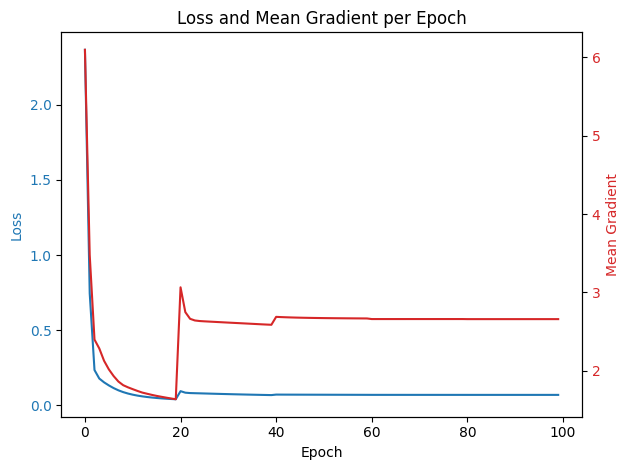

In [21]:
# define a neural network, MLP with 1 hidden layer
def func_nn(x, W1, b1, W2, b2):
    h1 = tanh_d(W1*x + b1)
    y = W2*h1 + b2
    return y

def mse(y, y_hat):
    loss = (y - y_hat)**2
    return loss

if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    
    ## generate data
    np.random.seed(0)
    x = np.linspace(-2, 2, 100)
    y = 2*x + 1 + np.random.randn(100)*0.1

    ## Parameters
    W1 = Tensor(0.1)
    b1 = Tensor(0.2)
    W2 = Tensor(0.3)
    b2 = Tensor(0.4)
    
    lr = 0.01
    nb_epoch = 100
    loss_history = []
    grad_history = []
    for epoch in range(nb_epoch):
        
        lst_loss = []
        grad_sum = 0.0
        for i in range(len(x)):
            x_i = Tensor(x[i])
            y_i = Tensor(y[i])

            y_hat = func_nn(x_i, W1, b1, W2, b2)
            loss = mse(y_i, y_hat)
            loss.backward()

            lst_loss.append(loss.data)
            grad_sum += abs(W1.grad) + abs(b1.grad) + abs(W2.grad) + abs(b2.grad)

            # Print gradients for debugging (first 3 epochs and first 3 samples)
            if epoch < 3 and i < 3:
                print(f"Epoch {epoch+1}, Sample {i+1}")
                print(f"W1.grad: {W1.grad}, b1.grad: {b1.grad}, W2.grad: {W2.grad}, b2.grad: {b2.grad}")
                print(f"W1.data: {W1.data}, b1.data: {b1.data}, W2.data: {W2.data}, b2.data: {b2.data}")
                print(f"loss: {loss.data}")

            # FIXME: Update with the gradient
            W1.data -= lr * W1.grad
            b1.data -= lr * b1.grad
            W2.data -= lr * W2.grad
            b2.data -= lr * b2.grad

            # FIXME: reset gradients
            W1.grad = 0.0
            b1.grad = 0.0
            W2.grad = 0.0
            b2.grad = 0.0

        mean_loss = np.mean(lst_loss)
        mean_grad = grad_sum / len(x)
        loss_history.append(mean_loss)
        grad_history.append(mean_grad)
        print(f"Epoch {epoch+1}/{nb_epoch}, Loss: {mean_loss}")

        # learning rate decay (fix: only decay every 20 epochs)
        if (epoch + 1) % 20 == 0:
            lr *= 0.1

    # Plot loss and gradient
    fig, ax1 = plt.subplots()
    ax1.plot(loss_history, color='tab:blue', label='Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(grad_history, color='tab:red', label='Gradient')
    ax2.set_ylabel('Mean Gradient', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title('Loss and Mean Gradient per Epoch')
    fig.tight_layout()
    plt.show()